In [67]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import praw
import datetime
import time
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

In [103]:
reddit = praw.Reddit(
        client_id="udETyhJL0aeOJK7cKBobFw",
        client_secret="_jleGnNzYrqZtRgC9WXlnTpPY8rtbA",
        user_agent="reddit_scraper_v1"
)

subreddits = [
    "politics", "conservative",
    "technology", "elonmusk", "SpaceX", "teslamotors",
    "cryptocurrency", "dogecoin"
]

In [104]:
keywords = ["Trump", "Donald", "election", "policy", "president", "Musk", "Elon", "Tesla", "SpaceX", "Dogecoin", "crypto", "DOGE", "dogecoin"]
start_date = int(datetime.datetime(2024, 8, 1).timestamp())
end_date = int(datetime.datetime(2025, 1, 31).timestamp())

In [105]:
def fetch_reddit_posts(subreddit, limit=10000):
    posts = []
    for submission in reddit.subreddit(subreddit).search(" OR ".join(keywords), sort="new", time_filter="all", limit=limit):
        post_date = datetime.datetime.utcfromtimestamp(submission.created_utc)
        if start_date <= submission.created_utc <= end_date:
            posts.append({
                "subreddit": subreddit,
                "title": submission.title,
                "selftext": submission.selftext,
                "score": submission.score,
                "num_comments": submission.num_comments,
                "created_utc": post_date,
                "url": submission.url
            })
    return posts

In [106]:
all_posts = []
for sub in subreddits:
    all_posts.extend(fetch_reddit_posts(sub))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [107]:
reddit_df = pd.DataFrame(all_posts)

reddit_df

,subreddit,title,selftext,score,num_comments,created_utc,url
0,technology,One controller working two towers during US ai...,,77229,3613,2025-01-30 23:25:25,https://www.9news.com.au/world/washington-dc-p...
1,technology,"Google Maps Adopted ‘Gulf of America’ Name, an...",,2888,317,2025-01-30 21:12:44,https://gizmodo.com/google-maps-adopted-gulf-o...
2,technology,Tech and consumer groups urge Trump White Hous...,,991,24,2025-01-30 19:07:49,https://www.cnbc.com/2025/01/30/tech-groups-ur...
3,technology,Trump’s $500 billion AI data-center project ex...,,0,12,2025-01-30 18:50:27,https://www.pv-magazine.com/2025/01/27/trumps-...
4,technology,President Donald Trump's move to delay TikTok ...,,10145,398,2025-01-30 11:35:53,https://www.upi.com/Top_News/US/2025/01/30/tik...
...,...,...,...,...,...,...,...
724,teslamotors,Brand loyalty still strong,“Tesla is the leader in brand loyalty. That’s ...,307,359,2024-09-02 19:10:53,https://www.forbes.com/sites/brookecrothers/20...
725,teslamotors,Tesla Has Allegedly Begun Mapping Warner Bros....,,314,120,2024-09-01 21:01:52,https://x.com/greentheonly/status/183033908555...
726,teslamotors,Tesla Robotaxi Event to Take Place at Hollywoo...,,361,173,2024-08-31 22:09:03,https://www.notateslaapp.com/news/2225/tesla-r...
727,teslamotors,"Tesla brings referral program to Canada, offer...",,168,107,2024-08-30 02:10:08,https://driveteslacanada.ca/news/tesla-brings-...


In [108]:
reddit_df.to_csv("reddit.csv", index=False)

In [109]:
def fetch_reddit_posts(subreddit, max_posts=5000):
    posts = []
    last_post = None

    while len(posts) < max_posts:
        try:
            query = " OR ".join(keywords)
            submissions = reddit.subreddit(subreddit).search(query, sort="new", limit=100, params={"after": last_post})

            batch = []
            for submission in submissions:
                post_date = datetime.datetime.utcfromtimestamp(submission.created_utc)
                if start_date <= submission.created_utc <= end_date:
                    batch.append({
                        "subreddit": subreddit,
                        "title": submission.title,
                        "selftext": submission.selftext,
                        "score": submission.score,
                        "num_comments": submission.num_comments,
                        "created_utc": post_date,
                        "url": submission.url
                    })

            if not batch:
                break

            posts.extend(batch)
            last_post = batch[-1]["created_utc"].timestamp()
            time.sleep(1)

        except Exception as e:
            print(f"Error fetching posts from r/{subreddit}: {e}")
            break

    return posts

In [110]:
all_posts = []
for sub in subreddits:
    print(f"Fetching posts from r/{sub}...")
    all_posts.extend(fetch_reddit_posts(sub, max_posts=5000))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from r/politics...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from r/conservative...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from r/technology...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from r/elonmusk...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Fetching posts from r/SpaceX...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Fetching posts from r/teslamotors...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Fetching posts from r/cryptocurrency...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from r/dogecoin...


In [111]:
reddit_df = pd.DataFrame(all_posts)
reddit_df.to_csv("reddit_data_large.csv", index=False)
reddit_df

,subreddit,title,selftext,score,num_comments,created_utc,url
0,elonmusk,WSJ: Amazon raises its ad spending on Elon Mus...,,0,70,2025-01-30 22:46:58,https://www.wsj.com/business/media/amazon-rais...
1,elonmusk,Boeing is working with Elon Musk to deliver Ai...,,0,10,2025-01-29 19:33:42,https://www.cnbc.com/2025/01/28/elon-musk-boei...
2,elonmusk,Elon Musk Asked by Donald Trump to Bring Sunit...,,0,9,2025-01-29 11:13:47,https://www.timesnownews.com/world/sunita-will...
3,elonmusk,"Elon responds with ""True"" to someone commentin...",,0,27,2025-01-28 07:58:59,https://x.com/elonmusk/status/1884122574432657756
4,elonmusk,"Elon (in video): ""The next <Neuralink> product...",,0,77,2025-01-28 07:56:30,https://x.com/teslaownersSV/status/18841149743...
...,...,...,...,...,...,...,...
15083,teslamotors,Tesla CEO Elon Musk loses bid to get $56 billi...,,0,1,2024-12-02 22:26:25,https://www.cnbc.com/2024/12/02/tesla-ceo-elon...
15084,teslamotors,Tesla loses bid to restore Elon Musk's $56bn p...,,1008,571,2024-12-02 22:21:07,https://i.redd.it/tqy070e8gi4e1.jpeg
15085,teslamotors,November at Tesla - Monthly Recap,,0,1,2024-12-02 21:00:53,https://x.com/Tesla/status/1863688035310711198
15086,teslamotors,Come join in the conversations in the original...,,0,0,2024-12-02 16:00:15,https://discord.gg/tesla


In [112]:
posts_df = pd.read_csv("reddit_data_large.csv")
posts_df

,subreddit,title,selftext,score,num_comments,created_utc,url
0,elonmusk,WSJ: Amazon raises its ad spending on Elon Mus...,NaN,0,70,2025-01-30 22:46:58,https://www.wsj.com/business/media/amazon-rais...
1,elonmusk,Boeing is working with Elon Musk to deliver Ai...,NaN,0,10,2025-01-29 19:33:42,https://www.cnbc.com/2025/01/28/elon-musk-boei...
2,elonmusk,Elon Musk Asked by Donald Trump to Bring Sunit...,NaN,0,9,2025-01-29 11:13:47,https://www.timesnownews.com/world/sunita-will...
3,elonmusk,"Elon responds with ""True"" to someone commentin...",NaN,0,27,2025-01-28 07:58:59,https://x.com/elonmusk/status/1884122574432657756
4,elonmusk,"Elon (in video): ""The next <Neuralink> product...",NaN,0,77,2025-01-28 07:56:30,https://x.com/teslaownersSV/status/18841149743...
...,...,...,...,...,...,...,...
15083,teslamotors,Tesla CEO Elon Musk loses bid to get $56 billi...,NaN,0,1,2024-12-02 22:26:25,https://www.cnbc.com/2024/12/02/tesla-ceo-elon...
15084,teslamotors,Tesla loses bid to restore Elon Musk's $56bn p...,NaN,1008,571,2024-12-02 22:21:07,https://i.redd.it/tqy070e8gi4e1.jpeg
15085,teslamotors,November at Tesla - Monthly Recap,NaN,0,1,2024-12-02 21:00:53,https://x.com/Tesla/status/1863688035310711198
15086,teslamotors,Come join in the conversations in the original...,NaN,0,0,2024-12-02 16:00:15,https://discord.gg/tesla


In [113]:
nltk.download('stopwords')
nltk.download('punkt')


english_swear_words = [
    "damn", "hell", "shit", "fuck", "asshole", "bastard", "bitch", "crap", "dick", "freak", "fucking", "cunt", "ass", "thing", "that", "this", "there", "even",
]

def clean_text(text, remove_stopwords=True, language="english"):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r"\d+", "", text)  # Remove numbers
        text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
        text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace

        if language == "english":
            swear_words = set(english_swear_words)

        if remove_stopwords:
            stop_words = set(stopwords.words(language))
            text = " ".join([word for word in text.split() if word not in stop_words and word not in swear_words])
        else:
            text = " ".join([word for word in text.split() if word not in swear_words])

        return text
    return ""

posts_df["full_text"] = posts_df["title"].fillna("") + " " + posts_df["selftext"].fillna("")

posts_df["cleaned_text"] = posts_df["full_text"].apply(lambda x: clean_text(x, language="english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


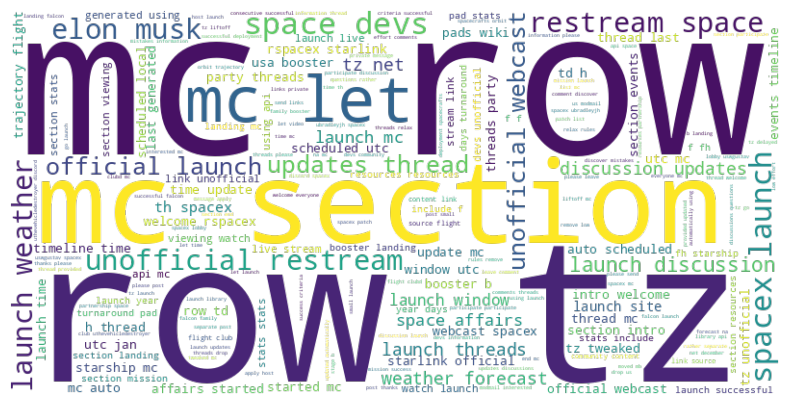

In [114]:
text = " ".join(posts_df["cleaned_text"].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color=None,
    mode="RGBA",
    colormap="viridis",
    max_words=200
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.gca().set_facecolor('none')
plt.gcf().set_facecolor('none')

plt.show()

wordcloud.to_file("wordcloud.png")

In [115]:
posts_df["sentiment"] = posts_df["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

positive_text = " ".join(posts_df[posts_df["sentiment"] > 0]["cleaned_text"].dropna())
negative_text = " ".join(posts_df[posts_df["sentiment"] < 0]["cleaned_text"].dropna())

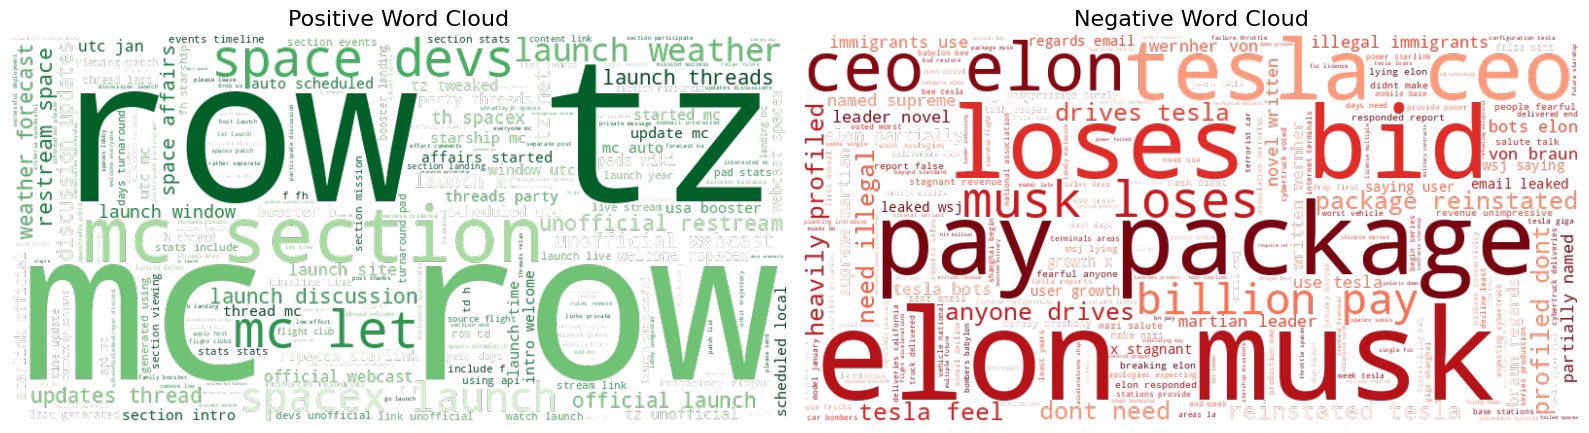

In [120]:
positive_wc = WordCloud(
    width=800,
    height=400,
    background_color=None,
    mode="RGBA",
    colormap="Greens_r",
    max_words=200
).generate(positive_text)

negative_wc = WordCloud(
    width=800,
    height=400,
    background_color=None,
    mode="RGBA",
    colormap="Reds_r",
    max_words=200
).generate(negative_text)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Positive Word Cloud
axes[0].imshow(positive_wc, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Positive Word Cloud", fontsize=16)

# Negative Word Cloud
axes[1].imshow(negative_wc, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Negative Word Cloud", fontsize=16)

plt.tight_layout()
plt.axis("off")
plt.gca().set_facecolor('none')
plt.gcf().set_facecolor('none')
plt.show()

positive_wc.to_file("positive_wordcloud.png")
negative_wc.to_file("negative_wordcloud.png")
